In [220]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.ensemble import RandomForestClassifier
import warnings
### model evaluation
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score


In [221]:
warnings.filterwarnings('ignore')

In [222]:
df = pd.read_csv("AnyConv.com__soil_types[2] (1).csv")

In [223]:
df

,"ID,N,8,0","MAPPING_UN,C,16","GEOLOGY,C,80","SLOPE,C,30","ECOLOGICAL,C,50","DRAINAGE,C,70","SOIL_PH,C,30","PH_DESCRIP,C,50","SUITABILIT,C,70","SOIL_TEXTU,C,50","SOIL_CLASS,C,50","VEGETATION,C,120","DISTRIBUTI,C,50","SOIL_CLA_1,C,50","PERCENTAGE,C,50","MAJOR_CROP,C,120","Depth,C,50"
0,1,15e,Nupe Sandstone,0 - 2%,Savannah Soils,Well Drained,6.2 - 6.2,Slightly Acidic,Fairly Higly Suitable with few physical limita...,Sandy Clay,Ustoxic Dystropept,Savanna woodland with scattered trees cultivat...,"41,647.21",Dystric Cambisol,4.51,"Sorghum,Maize,Yam,Cassava,Millet,Upland rice","Deep, Mostly Deep"
1,2,22a,Sandstone,0 - 13%,Savannah Soils,Shallow Drained,6.2 - 6.2,Slightly Acidic,Marginally Suitable,Sandy Loam,Typic Hapleustalf,"Sorghum, maize, Millet, Yam","4,716.39",Orthic Acrisol,0.51,"Sorghum,Maize,Yam,Cassava,Millet,Upland rice.",Shallow
2,3,2a,Recent Alluvium,0 - 2%,Wet Land Soils,Poorly Drained,5.9 - 4.9,Very Strongly Acidic,Moderately Suitable,Sandy Loam,Typic Tropaquept,Grassland,"76,515.95",Gleyic Acrisol,8.28,"Yam, Rice,Maize, Millet,Irish Potatoes","Deep, Mostly Deep"
3,5,24b,Undifferentiated Basement Complex,13 - 55%,Savannah Soils,Well Drained,5.1 - 6.6,Strogly acidic to Slightly Acidic,Currently Not Suitable,Sandy Clay,Typic Tropaquent,Grassland,"40,620.47",Gleyic Cambisol,4.40,"Sorghum,Millet,Cowpea,Cotton,G.nuts,Beans,Maiz...",Shallow
4,4,2a,Recent Alluvium,0 - 2%,Wet Land Soils,Poorly Drained,5.9 - 4.9,Very Strongly Acidic,Moderately Suitable,Sandy Loam,Typic Ustifluvent,Cultivated to swamp rice and oil palm,"76,515.95",Eutric Fluvisol,8.28,"Yam, Rice,Maize, Millet,Irish Potatoes","Deep, Mostly Deep"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
653,667,1c,Beach ridge sands and mounds,0 - 2%,Wet Land Soils,Poorly Drained,5.0 - 5.5,Very Strongly Acidic,Moderately Suitable,Sandy,Typic Tropaquent,Bush Fallow,"1,772.15",Dystric Regosol,0.19,"Yam,Rice,Cassava,Plantain,Banana,Cocoa,OilPalm...","Deep, Mostly Deep"
654,668,1c,Beach ridge sands and mounds,0 - 2%,Wet Land Soils,Poorly Drained,5.0 - 5.5,Very Strongly Acidic,Moderately Suitable,Sandy,Typic Psammaquent,Bush Fallow,"1,772.15",Gleyic Regosol,0.19,"Yam,Rice,Cassava,Plantain,Banana,Cocoa,OilPalm...","Deep, Mostly Deep"
655,669,1c,Beach ridge sands and mounds,0 - 2%,Wet Land Soils,Poorly Drained,5.0 - 5.5,Very Strongly Acidic,Moderately Suitable,Sandy,Typic Psammaquent,"Coconut, Cassava","1,772.15",Dystric Regosol,0.19,"Yam,Rice,Cassava,Plantain,Banana,Cocoa,OilPalm...","Deep, Mostly Deep"
656,670,3a,Aeolian sand over alluvium,0 - 2%,Wet Land Soils,Poorly Drained,7.0 - 8.4,Neutral to Moderately Alkaline,Moderately Suitable,Sandy Loam,Typic Ustipsamment,"Groundnut,Sorghum,Cotton,Maize,Millet,Cowpea","6,611.38",Gleyic Cambisol,0.72,"Groundnut,Sorghum,Cotton,Maize,Millet,Cowpea","Deep, Mostly Deep"


In [224]:
df.columns

Index(['ID,N,8,0', 'MAPPING_UN,C,16', 'GEOLOGY,C,80', 'SLOPE,C,30',
       'ECOLOGICAL,C,50', 'DRAINAGE,C,70', 'SOIL_PH,C,30', 'PH_DESCRIP,C,50',
       'SUITABILIT,C,70', 'SOIL_TEXTU,C,50', 'SOIL_CLASS,C,50',
       'VEGETATION,C,120', 'DISTRIBUTI,C,50', 'SOIL_CLA_1,C,50',
       'PERCENTAGE,C,50', 'MAJOR_CROP,C,120', 'Depth,C,50'],
      dtype='object')

In [225]:
df.head()

,"ID,N,8,0","MAPPING_UN,C,16","GEOLOGY,C,80","SLOPE,C,30","ECOLOGICAL,C,50","DRAINAGE,C,70","SOIL_PH,C,30","PH_DESCRIP,C,50","SUITABILIT,C,70","SOIL_TEXTU,C,50","SOIL_CLASS,C,50","VEGETATION,C,120","DISTRIBUTI,C,50","SOIL_CLA_1,C,50","PERCENTAGE,C,50","MAJOR_CROP,C,120","Depth,C,50"
0,1,15e,Nupe Sandstone,0 - 2%,Savannah Soils,Well Drained,6.2 - 6.2,Slightly Acidic,Fairly Higly Suitable with few physical limita...,Sandy Clay,Ustoxic Dystropept,Savanna woodland with scattered trees cultivat...,"41,647.21",Dystric Cambisol,4.51,"Sorghum,Maize,Yam,Cassava,Millet,Upland rice","Deep, Mostly Deep"
1,2,22a,Sandstone,0 - 13%,Savannah Soils,Shallow Drained,6.2 - 6.2,Slightly Acidic,Marginally Suitable,Sandy Loam,Typic Hapleustalf,"Sorghum, maize, Millet, Yam","4,716.39",Orthic Acrisol,0.51,"Sorghum,Maize,Yam,Cassava,Millet,Upland rice.",Shallow
2,3,2a,Recent Alluvium,0 - 2%,Wet Land Soils,Poorly Drained,5.9 - 4.9,Very Strongly Acidic,Moderately Suitable,Sandy Loam,Typic Tropaquept,Grassland,"76,515.95",Gleyic Acrisol,8.28,"Yam, Rice,Maize, Millet,Irish Potatoes","Deep, Mostly Deep"
3,5,24b,Undifferentiated Basement Complex,13 - 55%,Savannah Soils,Well Drained,5.1 - 6.6,Strogly acidic to Slightly Acidic,Currently Not Suitable,Sandy Clay,Typic Tropaquent,Grassland,"40,620.47",Gleyic Cambisol,4.40,"Sorghum,Millet,Cowpea,Cotton,G.nuts,Beans,Maiz...",Shallow
4,4,2a,Recent Alluvium,0 - 2%,Wet Land Soils,Poorly Drained,5.9 - 4.9,Very Strongly Acidic,Moderately Suitable,Sandy Loam,Typic Ustifluvent,Cultivated to swamp rice and oil palm,"76,515.95",Eutric Fluvisol,8.28,"Yam, Rice,Maize, Millet,Irish Potatoes","Deep, Mostly Deep"


In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 658 entries, 0 to 657
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID,N,8,0          658 non-null    int64  
 1   MAPPING_UN,C,16   658 non-null    object 
 2   GEOLOGY,C,80      658 non-null    object 
 3   SLOPE,C,30        658 non-null    object 
 4   ECOLOGICAL,C,50   658 non-null    object 
 5   DRAINAGE,C,70     658 non-null    object 
 6   SOIL_PH,C,30      658 non-null    object 
 7   PH_DESCRIP,C,50   658 non-null    object 
 8   SUITABILIT,C,70   658 non-null    object 
 9   SOIL_TEXTU,C,50   658 non-null    object 
 10  SOIL_CLASS,C,50   658 non-null    object 
 11  VEGETATION,C,120  658 non-null    object 
 12  DISTRIBUTI,C,50   658 non-null    object 
 13  SOIL_CLA_1,C,50   658 non-null    object 
 14  PERCENTAGE,C,50   658 non-null    float64
 15  MAJOR_CROP,C,120  658 non-null    object 
 16  Depth,C,50        658 non-null    object 
dt

In [227]:
df["ID,N,8,0"]

0        1
1        2
2        3
3        5
4        4
      ... 
653    667
654    668
655    669
656    670
657    671
Name: ID,N,8,0, Length: 658, dtype: int64

In [228]:
df["MAPPING_UN,C,16"].value_counts()

24b    89
18d    47
2a     42
15g    34
15d    31
24a    29
22c    26
21c    25
1b     23
3a     20
1c     19
17a    15
19a    15
21a    14
11a    13
15e    13
2b     13
12a    12
7c     10
13a    10
15c    10
15a     8
8a      8
21b     8
18a     8
1a      8
22a     7
18b     7
22b     6
20b     5
20a     5
2c      5
14a     5
7a      5
15f     5
6a      5
5d      4
9a      4
5c      4
4a      4
19c     4
5b      3
5a      3
1d      3
10a     3
8b      3
16b     3
7b      2
6b      2
5f      2
18c     2
16a     1
15b     1
17b     1
23a     1
14b     1
5e      1
19b     1
Name: MAPPING_UN,C,16, dtype: int64

In [229]:
df["MAPPING_UN,C,16"].replace(["1a", "1b", "1c", "1d", "2a", "2b", "2c", "3a", "4a", "5a", "5b", "5c", "5d", "5e", "5f", "6a", "6b", "7a", "7b", "7c", "8a", "8b", "9a", "10a", "11a", "12a", "13a", "14a", "14b", "15a", "15b", "15c", "15d", "15e", "15f", "15g", "16a", "16b", "17a", "17b", "18a", "18b", "18c", "18d", "19a", "19b", "19c", "20a", "20b", "21a", "21b", "21c", "22a", "22b", "22c", "23a", "24a", "24b"],
                              [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57], inplace = True)

In [230]:
df["MAPPING_UN,C,16"][:10]

0    33
1    52
2     4
3    57
4     4
5     7
6    52
7    52
8    40
9    33
Name: MAPPING_UN,C,16, dtype: int64

In [231]:
df["GEOLOGY,C,80"].value_counts()

Undifferentiated Basement Complex                                       238
Sandstone and Shales                                                     56
Migmatite                                                                47
Recent Alluvium                                                          42
Sandstones, Mudstones and Shales                                         31
Aeolian sand over alluvium                                               27
Mangrove Swamps                                                          23
Beach ridge sands and mounds                                             19
Shales                                                                   16
Nupe and other cretaceous sandstone                                      14
Nupe Sandstone                                                           13
Old and subrecent Alluvium                                               13
Coastal Plain sands and Sandstone                                        12
Sand dumes o

In [232]:
df["GEOLOGY,C,80"].replace(["Undifferentiated Basement Complex", "Sandstone and Shales", "Migmatite", "Recent Alluvium", "Sandstones, Mudstones and Shales", "Aeolian sand over alluvium", "Mangrove Swamps", "Beach ridge sands and mounds", "Shales", "Nupe and other cretaceous sandstone", "Nupe Sandstone", "Old and subrecent Alluvium", "Coastal Plain sands and Sandstone", "Coastal Plain sands", "Sand dumes over Sandstone and chad sediment and Basement Complex", "Colluvial deposits over granitic materials", "Sandstone on Basement Complex", "Deltaic Basin and Tidal flats", "Aeolian sands", "Sandstone", "Newer Basalts over Basement Comple", "Sandstone (Abeokuta Formation)", "Sandstone (Ilaro-Abeokuta Formation)", "Lagoonal marshes and back fresh water", "Sandy Materials", "Transitional materials of subrecent alluvium and coastal palin sands", "Coastal plain sands II (Ultisols)", "Basalts", "Quartzites, quarts-schists and Amphibolites", "Coastal Plain Sands (Alfisols)", "Sambreiro-Warri Deltaic plains", "Aeolian sand over sandstone", "Ewekoro Formation (Upper Coal measure", "Upper Coal Measure (Ewekoro Formation)"],
                          [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,], inplace = True)

In [233]:
df["GEOLOGY,C,80"]

0      10
1      19
2       3
3       0
4       3
       ..
653     7
654     7
655     7
656     5
657    14
Name: GEOLOGY,C,80, Length: 658, dtype: int64

In [234]:
df["SLOPE,C,30"].value_counts()

0 - 2%                302
0 - 6%                149
13 - 55%              119
0 - 13%                39
0 - 22%                15
0 - 6% and 5 - 30%     13
0 - 2 and 5 - 30%      11
6 - 25%                10
Name: SLOPE,C,30, dtype: int64

In [235]:
df["SLOPE,C,30"].replace(["0 - 2%", "0 - 6%", "13 - 55%", "0 - 13%", "6 - 25%", "0 - 22%", "0 - 6% and 5 - 30% ", "0 - 2 and 5 - 30%", "6 - 25%", "0 - 6% and 5 - 30%"],
                        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], inplace = True)

In [236]:
df["SLOPE,C,30"][449:500]

449    8
450    9
451    0
452    0
453    0
454    9
455    0
456    7
457    9
458    8
459    8
460    7
461    8
462    0
463    9
464    8
465    0
466    7
467    7
468    9
469    8
470    0
471    7
472    0
473    8
474    7
475    9
476    0
477    0
478    9
479    7
480    2
481    0
482    3
483    0
484    0
485    1
486    0
487    0
488    0
489    3
490    1
491    1
492    0
493    0
494    0
495    1
496    0
497    1
498    0
499    1
Name: SLOPE,C,30, dtype: int64

In [237]:
df["ECOLOGICAL,C,50"].value_counts()

Savannah Soils       427
Wet Land Soils       137
Rainforest Soils      74
Rain forest Soils     20
Name: ECOLOGICAL,C,50, dtype: int64

In [238]:
df["ECOLOGICAL,C,50"].replace(["Savannah Soils", "Wet Land Soils", "Rainforest Soils", "Rain forest Soils"],
                             [0, 1, 2, 3], inplace = True)

In [239]:
df["ECOLOGICAL,C,50"][299:350]

299    0
300    0
301    0
302    0
303    0
304    0
305    0
306    0
307    0
308    0
309    0
310    0
311    0
312    0
313    0
314    0
315    0
316    0
317    0
318    0
319    0
320    0
321    0
322    0
323    0
324    0
325    0
326    0
327    0
328    0
329    0
330    0
331    3
332    0
333    0
334    0
335    0
336    0
337    0
338    0
339    0
340    0
341    0
342    0
343    0
344    0
345    0
346    0
347    0
348    0
349    2
Name: ECOLOGICAL,C,50, dtype: int64

In [240]:
df["DRAINAGE,C,70"].value_counts()

Well Drained           319
Poorly Drained         193
Moderately Drained      75
Imperfectly Drained     64
Shallow Drained          7
Name: DRAINAGE,C,70, dtype: int64

In [241]:
df["DRAINAGE,C,70"].replace(["Well Drained", "Poorly Drained", "Moderately Drained", "Imperfectly Drained", "Shallow Drained"],
                           [0, 1, 2, 3, 4, ], inplace = True)

In [242]:
df["DRAINAGE,C,70"]

0      0
1      4
2      1
3      0
4      1
      ..
653    1
654    1
655    1
656    1
657    2
Name: DRAINAGE,C,70, Length: 658, dtype: int64

In [243]:
df["SOIL_PH,C,30"].value_counts()

5.1 - 6.6      89
5.5 - 6.3      47
5.9 - 4.9      42
4.5 - 5.5      35
6.3            34
6.6 - 7.3      31
5.1 - 5.6      29
5.8 - 7.0      26
5.6 - 5.9      25
5.1 - 6.5      24
7.0 - 8.4      24
4.5 - 5.2      23
5.0 - 5.5      21
6.2 - 6.2      20
8.5 - 9.1      15
 5.6 - 6.9     14
6.5 - 7.8      13
 5.1 - 7.3     10
5.9 - 6.3      10
5.6 - 6.5      10
7.0 - 7.8       8
6.3 - 8.5       8
4.6 - 5.0       8
4.9 - 6.5       8
4.2 - 4.6       7
3.9 - 4.2       6
5.1 - 5.9       5
5.1             5
5.5 - 5.9       5
8.5 - 8.7       5
5.0 - 5.8       5
 3.6 - 5.0      5
 5.1 - 5.5.     5
5.6 - 5.8       4
4.2 - 4.7       4
5.1 - 6.0       4
5.6 - 6.0       3
6.6 - 6.9       3
4.7 - 5.8       3
5.1 - 5.3       3
4.6 - 4.8       2
5.6 - 6.1.      2
5.2 - 6.0       2
3.9 - 4.4       1
5.1 - 5.5       1
5.4 - 6.2       1
4.5 - 4.9       1
5.1 - 5.8       1
4.3 - 4.9       1
Name: SOIL_PH,C,30, dtype: int64

In [244]:
df["SOIL_PH,C,30"].replace(["5.1 - 6.6", " 3.6 - 5.0", "5.5 - 6.3", " 5.6 - 6.9", " 5.1 - 5.5.", "5.9 - 4.9", "4.5 - 5.5", "6.3", "6.6 - 7.3", "5.1 - 5.6", "5.8 - 7.0", "5.6 - 5.9", "5.1 - 6.5", "7.0 - 8.4", "4.5 - 5.2", "5.0 - 5.5", "6.2 - 6.2", "8.5 - 9.1", "5.6 - 6.9", "6.5 - 7.8", "5.6 - 6.5", " 5.1 - 7.3", "5.9 - 6.3", "4.6 - 5.0", "4.9 - 6.5", "7.0 - 7.8", "6.3 - 8.5", "6.3 - 8.5", "4.2 - 4.6", "3.9 - 4.2", "5.0 - 5.8", "8.5 - 8.7", "5.1 - 5.9", "3.6 - 5.0", "5.1 - 5.5.", "5.5 - 5.9", "5.1", "5.1 - 6.0", "5.6 - 5.8", "4.2 - 4.7", "6.6 - 6.9", "4.7 - 5.8", "5.1 - 5.3", "5.6 - 6.0", "5.2 - 6.0", "5.6 - 6.1.", "4.6 - 4.8", "3.9 - 4.4", "4.5 - 4.9", "5.1 - 5.5", "4.3 - 4.9", "5.4 - 6.2", "5.1 - 5.8"],
                          [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52], inplace = True)

In [245]:
df["SOIL_PH,C,30"][449:500]

449    21
450    12
451     7
452    15
453     7
454    12
455     7
456    12
457    12
458    21
459    21
460    12
461    21
462    20
463    12
464    21
465    20
466    43
467    43
468    12
469    21
470    20
471    43
472    20
473    21
474    12
475    12
476     5
477    20
478    12
479    12
480     0
481     2
482    10
483     2
484     2
485    11
486     2
487     7
488     7
489    10
490    11
491    11
492     1
493    52
494     1
495    30
496    41
497    30
498     5
499    30
Name: SOIL_PH,C,30, dtype: int64

In [246]:
df["PH_DESCRIP,C,50"].value_counts()

Strogly acidic to Slightly Acidic       209
Very Strongly Acidic                    116
Slightly Acidic                          99
Moderately Acidic                        72
Slightly acidic to Neutral               57
Neutral to Moderately Alkaline           32
Very Strongly Acidic to Neutral          18
Very strongly to Strongly alkaline       15
Slightly acidic to slightly alkaline     13
Slightly acidic to strongly alkaline      8
Slightly to very strongly acidic          6
Slightly alkaline                         5
Moderately acidic to strongly acidic      5
Neutral                                   3
Name: PH_DESCRIP,C,50, dtype: int64

In [247]:
df["PH_DESCRIP,C,50"].replace(["Strogly acidic to Slightly Acidic", "Very Strongly Acidic", "Slightly Acidic", "Moderately Acidic", "Slightly acidic to Neutral", "Neutral to Moderately Alkaline", "Very Strongly Acidic to Neutral", "Very strongly to Strongly alkaline", "Slightly acidic to slightly alkaline", "Slightly acidic to strongly alkaline", "Slightly to very strongly acidic", "Moderately acidic to strongly acidic", "Slightly alkaline", "Neutral"],
                             [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], inplace = True)

In [248]:
df["PH_DESCRIP,C,50"]

0      2
1      2
2      1
3      0
4      1
      ..
653    1
654    1
655    1
656    5
657    3
Name: PH_DESCRIP,C,50, Length: 658, dtype: int64

In [249]:
df["SUITABILIT,C,70"].value_counts()

Moderately Suitable                                   270
Fairly Higly Suitable with few physical limitation    173
Currently Not Suitable                                119
Marginally Suitable                                    96
Name: SUITABILIT,C,70, dtype: int64

In [250]:
df["SUITABILIT,C,70"].replace(["Moderately Suitable", "Fairly Higly Suitable with few physical limitation", "Currently Not Suitable", "Marginally Suitable"],
                             [0, 1, 2, 3], inplace = True)

In [251]:
df["SUITABILIT,C,70"]

0      1
1      3
2      0
3      2
4      0
      ..
653    0
654    0
655    0
656    0
657    1
Name: SUITABILIT,C,70, Length: 658, dtype: int64

In [252]:
df["SOIL_TEXTU,C,50"].value_counts()

Sandy Clay            337
Sandy Loam            189
Clay Loam              60
Concretionary Clay     29
Sandy                  19
Loamy Fine Sand        13
Silty Loam             10
Silty Clay              1
Name: SOIL_TEXTU,C,50, dtype: int64

In [253]:
df["SOIL_TEXTU,C,50"].replace(["Sandy Clay", "Sandy Loam", "Clay Loam", "Concretionary Clay", "Sandy", "Loamy Fine Sand", "Silty Loam", "Silty Clay"],
                             [0, 1, 2, 3, 4, 5, 6, 7], inplace = True)

In [254]:
df["SOIL_TEXTU,C,50"]

0      0
1      1
2      1
3      0
4      1
      ..
653    4
654    4
655    4
656    1
657    1
Name: SOIL_TEXTU,C,50, Length: 658, dtype: int64

In [255]:
np.random.seed(42)
df["SOIL_CLASS,C,50"].value_counts(ascending = True).iloc[109:130]

Aeric Tropaquept       14
Oxic Haplustalf        17
Typic Fluvaquent       20
Typic Paleustult       20
Ustoxic Dystropept     22
Typic Ustipsamment     23
Oxic Tropudalf         28
Typic Tropaquept       34
Oxic Dystropept        35
Typic Tropaquent      102
Name: SOIL_CLASS,C,50, dtype: int64

In [256]:
df["SOIL_CLASS,C,50"].replace(["Arenic Paleudult", "Lithic Ustorthents", "Acquic Haplustalf", "Arenic Paleustalt", "Typic Rhodustult",  "Typic Tropudalf", "Oxic Ustipsamment", "Arenic Haplustalf", "Dystropeptic Tropodult", "Oxic Paleustults", "Orthoxic Tropudult", "Aquic Paleustalf", "Arenic Ustropept", "Aquic Hapludult", "Typic Rhodustalf", "Typic Dystropepts", "Vertic Torrifluvent", "Oxic Haplustalfs", "Ustoxic Drystropept", "Ustic Dystropept", "Typic Torrifluvent", "Oxic Ustropepts", "Typic Utropept", "Ultic Haplustalf", "Oxic Rhodudalf", "Aeric Tropic Flavaquent", " Typic  Chromustert", "Ustic Torrifluvent", "Oxic Eutropept", "Aquic Tropopsament", "Lithic Ustropept", "Typic tropaqualf", "Vertic Ustifluvent", "Petrocalcic Paleustalf", "Vetic Haplustalf", "Udic Paleystalf", "Udic Paleustalf", "Plinthustult", "Aquic Ustifluvent", "Typic Tropaquepts", "Typic Haplaquept", "Orthic Tropudult", "Aquic Arenic Haplustalf", "Aquultic Paleustalf", "Typic Haplaquent", "Lithic Haplustult", "Typic Tropaqult", "Vertic Tropaqualf", "Oxic Dystropepts", "Oxic Tropudult", "Ustic Paleustalf", "TYpic Tropaquept", "Oxic tropudalf", " Arenic haplustalf", "Typic Tropopsamments", "Arenic Paleustalf", "Lithic Dystropept", "Lithic Haplustalf", "Plinthic Tropudult", "Typic Utipsamment", " Psammentic Haplustalf", "Aeric Tropaqualf", "Cross arenic Paleudult", "Alfic Ustipsamment", "Arenic Paleustult", "Lithic Ustrorthent", "Oxic haplustalf", "Vertic Tropaquept", "Tropic Sulfic Fluvaquent", "Oxic Paleustalfs", "Ustoxic Dystropepts", "Udic Haplustalf", "Ultic Paleustalf", "Lypic Tropothents", "(Rhodic) Ultic Paleustalf", "Aquic Paleudult", "Typic Torriorthent", "Typic Tropopsamment", "Typic Ustorthent", "Ustic Dystropepts", "Typic paleudult", "Aeric Tropaqualfs", "Oxic Paleustult", "Aquic Ustipsamment", "Typic Ustropept", "Typic tropopsamment", "Typic Torripsamment", "Aquic Dystropept", "Rhodic Paleudult", "Typic Udipsamment", "Typic Psammaquent", "Typic Hapleustalf", "Typic Tropaqualf", "Typic Paleudult", "Typic Dystropept", "Typic Haplustult", "Typic Haplustults", "Oxic Ustropept", "Typic Paleustalf", "Lithic Troporthent", "Aquic Haplustalf", "Oxic Haplustults", "Oxic Paleustalf", "Typic Ustifluvent", "Lithic Ustorthent", "Oxic Haplustult", "Typic Tropudult", "Typic Haplustalf", "Orthic Tropudalf", "Aeric Tropaquept", "Oxic Haplustalf", "Typic Fluvaquent", "Typic Paleustult", "Ustoxic Dystropept", "Typic Ustipsamment", "Oxic Tropudalf", "Typic Tropaquept", "Oxic Dystropept", "Typic Tropaquent"],
                             [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119], inplace = True)

In [257]:
df["SOIL_CLASS,C,50"]

0      114
1       92
2      117
3      119
4      104
      ... 
653    119
654     91
655     91
656    115
657     43
Name: SOIL_CLASS,C,50, Length: 658, dtype: int64

In [258]:
np.random.seed(42)
df["VEGETATION,C,120"].value_counts(ascending= True)

Cassava, Maize                                   1
Forest Reserve                                   1
Cassava, Vegetables and Plantain                 1
Grassland Dominated by Pennisetum Spp.           1
Grassland and Grazing                            1
                                                ..
Groundnut,Sorghum,Cotton,Maize,Millet,Cowpea    24
Fallow                                          27
Rain Forest                                     32
Secondary Bush                                  58
Grassland                                       90
Name: VEGETATION,C,120, Length: 230, dtype: int64

In [259]:
df["VEGETATION,C,120"].replace(["cultivated to maize and groundnut", "Fallow, Derived Savanna", 'Sorghum, Maize, Millet, Potatoes "Acha"', "Cultivated to rice, maIize and sugarcane", "Secondary Bush with Oil Palms / Eupatorim dominant", "Maize and Sorghum farms and meadow", "Grass / Shrubs", "Very few shrubs", "Savannah Woodland  Maize,Yam and Sorghum", "Millet, Guinea Corn", "Savannah Woodland cultivated to Sorghum", "Cassava, Maize, Oil Palm", "Cassava farm", "Sorghum, millet and yam", "Open Savanna shrubland, cultivated to millet,  beans and groundnut.", "Derived Savannah with mainly Grasses and many shrubs and trees, cultivated to guinea corn,maize, yam, Cassava", "Sorghum,Millet,Beans and Groundnut", "Secondary savanna bush", "Derived Savannah with Grasses,(Imperata Cylindrica) some trees ususally cultivated to guinea corn,maize, yam, Cassava", "Open Savannah shrubland , cultivated to millet and Beans", "Eupatorium Odoratum", "Millet,Guinea Corn, Yam", "Cultivated to swamp rice and oil palm", "Scrub land within  Pennisetum", "Sugarcane, Vegetables", "Grass-Tree Mosaic yam, maize and cassava", "Open Savanna Shrubland", "Long Fallow, Open Savanna grassland", "Sorghum, Millet, Millet and Vegetables", "Millet, Sorghum, Yam,Maize and Groundnut", "Sorghum Vegetables", "Acacia Shrubs", "Open Savannah Woodland cultivated to Sorghum, Millet, Maize, Beans, Groundnut", "Cultivated to rice, vegetables and tall grasses in part", "FAllow rice paddy, Marshy grassland", "Riverine open shrubland, cultivated to rice beans and dry season vegetables", "Cassava, Maize", "Guinea Savannah, Guinea Corn Millet. ,Maize, Cassava and Cowpea", "Sorghum, Millet, Vegetables", "Rice, Maize,Yam, Guinea Corn", "Forest", "Maize Guinea Corn, Shea butter", "Semi-desert with scattered palms, cultivated to millet, beans, groundnut and cassava.", "Scrub land and Pennisetum", "Savanna Woodland / Forest Reserve", "Fallow Guinea Savanna", "Grassland with shrub and thorn trees", "Fallow Savanna Shrub", "Partially Cultivated", "Kadanya, Dorowa", "Fallow with Shrubs,trees (Kaya) Groundnut,Sorghum,Millet", "Andropogon Spp and Eupatorium", "Fallow savannah", "Andropogon Grasses", "Secondary Bush - Oil palm", "Derived Savanna, Usual crops are Guinea Corn, Millet, Maize, Yam and Cassava", "Tree (Tsanuya) shrubs", "Rain Forset", "Savannah Shrubland cultivated to sorghum, Millet and maize, groundnut", "Sabara and Magariya grasses", "Shrub Savannah and heacy grazing with sparse cultivation of millet", "Thorny Shrubs,Baobab, Mango,Fallow Land Trees", "Grassland with thorny shrubs.", "Derived Savanna bush", "Derived Savanna bush", "Savannah Woodland cultivated  to sorghum, maize,onions, Okro and Tomatoes.", "Savanna Fallow Land", "Savannah Woodland, Yam, Maize, Cashew, Cassava and Locust Beans", "Shrubs with Grasses", "Yam,Cassava, Vegetables","Thorn trees (ACACIA AOO) cultivated during reseeding flood / earth minning", "Grassland Dominated by Pennisetum Spp.", "Tea Plantation", "Fadama Grassland", "Cassava and Oil Palm", "Cultivated to sorghum and  Locust Beans", "Savannah Grass and Shrub Fallow", "Forest Reserve", "Maize,Millet,Sorghum,Yam and Groundnut", "Open Savanna shrubland, cultivated to millet, beans and sorghum.", "Cassava / Maize Farm", "Cassava, Vegetables and Plantain", "Fallow Previously cropped to guinea corn", "Meadow ans some maize and Sorghum", "Savannah Grassland with tall trees", "Oil Palm bush", "Grassland and Grazing", "Woodland Savanna, Yams, Sorghum, Maize and Cassava", "Hilly grassland Cultivated to Rice, Maize, Sorghum, Cocoyam, Okro", "Current Farm Land", "Savanna woodland sorghum, maize and yam", "Cassava, Yam", "Secondary Bush with Oil Palms", "Sorghum, Millet, Maize", "Guinea Savannah; crops grown are sorghum, millet, groundnut and yam", "Secondary bush", "Derived Savanna Fallow", "Cassava and Yam Farm", "Fallow Savanna Shrubland", "Savannah Woodland cultivated  to sorghum and maize", "Derived Savannah Woodland","Mainly grassland with scattered thorn shrubs, cultivated during receeding flood and grazing in dry season", "Guinea savannah Bush fallow", "Uncultivated", "Savannah Shrub", "Cassava,Oil Palm,Raphia palm", "Woodland Savannah", "Open Savanna Shrubland cultivated to Millet and Sorghum", "Savannah Arable Farming", "Savanna Woodland  and Shrubs", "Open Savannah with Shrubs cultivated to maize, sorghum,millet, Beans  and Groundnut", "Fallow with tree shrub and Grass undergrowth", "Savanna Fallow", " Fallow Guinea Savanna", "Fallow with green Vegetation", "Savanna", "Savannah Woodland cultivated to Sorghum, Millet,Beans and Groundnut", "Grasses", "Cultivated to Sorghum and Nim trees", "Cultivated to sorghum and Beans", "Riverine open shrub land, dry season vegetables", "Secondary Forest fallow", "Open Savannah Woodland, Fallow", "Millet and Sorghum", "Extensively cultivated to sugarcane maize and rice", "Sorghum, maize and yam", "Fallow Savanna and Shrubland", "Woodland Savanna, Yams and Cassava", "Riparian forest, Sorghum", "Cultivated to Maize", "Secondary Bush, E.Odoratum, Panicum Spp.", "Savanna Shrub", "Open Savanna Shrubland cultivated to Millet,Beans and Groundnut", "Alluvial shrub savannah cultivated maize, millet and sorghum", "Thorny Shrubs, Mango,Maize and Guinea Corn (savannah)", "Derived Savannah usual crops are Sorghum, Millet, Maize and yam", "Savannah woodland cultivated to millet, Beans  and Groundnut", "Savanna shrubland, cultivated to millet, sorghum and beans.", "Fallow previously cropped to Guinea Corn", "Scattered thorny trees, Fallow", "Cultivated to Cowpea and Sorghum", "Grass /Tree mosaic; Yam, Cassava and maize", "Farms cultivated to maize and sorghum", "Cultivated to Cassava, Yam and Sorghum", "Scrub Woodland", "Degraded Savannah Woodland partly Cultivated to Maize", "Long Fallow, Open Savanna Woodland", "Forest reserve", "Oil Palm bush / Rice Paddy", "Savannah Woodland cultivated  to sorghum,Rice,Sugarcane,Vegetables  and maize", "Shrubs, MangoMillet and Guinea Corn", "Oil Palm bush (fallow) Eupatorium odoratum", "Shrubland Savanna, cultivated millet, beans", "Sorghum,Millet", "Savannah Shrub Land farm", "Sorghum and Groundnut", "OIl Palms,Plantain,Cassava", "Savannah cultivated to millet and Groundnut", "Cassava", "Rice Paddy", "Banana, Trees", "Cultivated to maize and Groundnut", "Savannah Woodland cultivated  to maize,Groundnuts,Bambara nuts and cassava.", "Derived savanna Fallow Land", "Open Savanna Woodland", "Guinea Savanna bush Fallow", "Sorghum", "Milllet, Sorghum,Yam, Maize and Groundnut", "Fallow Grassland", "Guinea Savannah", "Sorghum, Millet, Maize,Yam and Groundnut", "Guinea Corn,Maize, Cassava and Cowpea", "Eupatorium, Spear Grass", "Millet, Sorghum and Yam", "Yam,Rice,Cassava,Maize,Cocoa,OilPalm", "Oil Palm", "Guinea Corn", "Maize Guinea Corn", "Cultivated to rice", "Sorghum, Millet and Yam", "Savannah Woodland cultivated to Sorghum, Millet, Maize, Beans, Groundnut", "Cultivated to Millet", "Fallow Maize", "Savannah Shrubland cultivated to sorghum, Millet and maize", "Sorghum, Millet, Yam", "Fallow Mango Groove (Adjoining Corn Field)", "Open Savannah Woodland  cultivated to Groundnut and Sorghum", "Sorghum, Maize, Millet, Potatoes(Acha)", "Long Fallow, Guinea Savanna Woodland", "Degraded Savannah Woodland", "Open Savanna shrubland, cultivated to millet and beans.", "Oil Palm Cassava", "Open Savannah Woodland", "Rain Forset / Fallow", "Ferns", "Open Savanna woodland cultivated to Millet and Beans", "Open Savanna woodland", "Shrubs", "Fallow, Sorghum Land", "Tropical Rain Forest", "Savannah Woodland", "Savanna woodland with scattered trees cultivated to sorghum, Millet and Groundnut", "Cultivated to Sorghum", "Fallow,open savanna woodland", "Banana, Maize, Guinea Corn", "Rain forest fallow", "Shrub Woodland", "Guinea Savannah / Fallow", "Savanna Grassland", "Guinea savanna", "Raphia Palms,Ferns", "Savannah crops grown include sorghum, Millet and Maize", "Grassland Fallow", "Derived savanna fallow", "Savanna woodland cultivated to Millet, beans, groundnut  and Sorghum", "Oil Palm Bush", "Millet,Guinea Corn and Groundnut", "Sorghum, maize, Millet, Yam", "Sorghum and Vegetables", "Rain forest", "Grass", "Guinea Savanna", "Coconut, Cassava", "Fallow Guinea savanna", "Rainforest", "Bush Fallow", "Mangrove Trees - Rhizophora Spp", "Groundnut,Sorghum,Cotton,Maize,Millet,Cowpea", "Fallow", "Rain Forest", "Secondary Bush", "Grassland"],
                               [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111,  112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231], inplace = True)

In [260]:
df["VEGETATION,C,120"][49:100]

49     94
50    104
51     13
52      2
53    180
54    141
55    147
56     89
57      1
58    189
59     10
60    127
61    180
62     87
63    164
64    189
65    188
66     88
67    188
68     33
69    131
70    122
71    111
72    140
73    231
74    186
75    178
76     84
77     34
78    231
79     47
80    227
81     44
82    137
83     50
84    227
85    107
86    195
87    227
88    227
89    214
90    227
91    195
92    178
93    227
94    190
95    212
96    169
97      8
98    230
99    184
Name: VEGETATION,C,120, dtype: int64

In [261]:
df["DISTRIBUTI,C,50"].value_counts()

40,620.47     89
92,048.48     47
76,515.95     42
167,967.01    34
33,720.12     31
6,350.88      29
84,296.24     26
27,934.31     25
6,611.38      24
8,128.33      23
1,772.15      19
21,172.57     15
25,243.45     15
7,515.42      14
4,727.07      13
41,647.21     13
15,517.11     13
5,390.44      12
711.01        10
5,102.14      10
4,716.39      10
9,029.21      10
3,833.63       8
58,013.20      8
5,323.75       8
26,317.33      8
8,463.62       8
8,204.13       7
5,567.97       6
5,076.02       5
7,877.00       5
8,743.47       5
3,866.37       5
1,500.49       5
853.22         5
1,523.52       5
6,496.88       4
1,651.56       4
6,793.86       4
5,445.54       4
178.98         3
2,655.61       3
1,799.60       3
1,015.03       3
3,968.03       3
16,051.30      3
1,934.45       2
517.32         2
352.81         2
2,183.96       1
828.70         1
1,358.28       1
5,068.57       1
586.36         1
1,614.99       1
Name: DISTRIBUTI,C,50, dtype: int64

In [262]:
df["DISTRIBUTI,C,50"].replace(["40,620.47", "92,048.48", "76,515.95", "167,967.01", "33,720.12", "1,523.52", "6,350.88", "84,296.24", "27,934.31","6,611.38", "8,128.33", "1,772.15", "21,172.57", "25,243.45", "7,515.42", "41,647.21", "4,727.07", "15,517.11", "5,390.44", "711.01", "9,029.21", "828.70", "4,716.39", "5,102.14", "26,317.33", "1,614.99", "58,013.20", "3,833.63", "8,463.62", "5,323.75", "8,204.13", "5,567.97", "5,076.02", "1,500.49", "8,743.47", "7,877.00", "3,866.37", "853.22", "1,651.56", "5,445.54", "6,793.86", "6,496.88", "178.98", "3,968.03", "2,655.61", "1,799.60", "16,051.30", "1,015.03", "1,934.45", "352.81", "517.32", "5,068.57", "586.36", "1,358.28", "1,614.99" "828.70", "2,183.96" ],
                             [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55], inplace = True)

In [263]:
df["DISTRIBUTI,C,50"][499:550]

499    33
500    39
501    45
502     2
503     2
504     2
505    42
506     5
507    50
508    19
509    16
510    16
511    27
512    20
513    20
514    45
515    39
516    33
517    39
518    27
519    19
520    16
521    41
522     2
523     2
524    18
525     5
526    41
527    40
528     2
529    22
530    34
531    40
532     2
533    40
534     5
535     2
536    40
537     2
538    20
539     3
540     2
541    20
542     2
543    46
544     7
545    37
546    37
547    53
548    50
549    42
Name: DISTRIBUTI,C,50, dtype: int64

In [264]:
df["SOIL_CLA_1,C,50"].value_counts()

Gleyic Cambisol      125
Orthic Luvisol       103
Orthic Acrisol        60
Dystric Cambisol      57
Dystric Nitosol       32
Dystric Regosol       26
Eutric Regosol        22
Eutric Cambisol       22
Humic Gleysol         20
Gleyic Luvisol        19
Lithosol              18
Chromic Luvisol       17
Ferric Acrisol        16
Gleyic Regosol        15
Eutric Fluvisol       13
Dystric Fluvisol      11
Ferric Luvisol         9
Eutric Gleysol         8
Eutric cambisol        7
Typic Ustifluvent      6
Dystric Gleysol        5
Plinthic Acrisol       4
Dystric Acrisol        4
Eutric Nitosol         3
Dystric cambisol       2
Cleyic Luvisol         2
Gleyic Acrisol         2
Vertic Luvisol         2
Eustric Regosol        2
Plinthic Luvisol       2
Eutric regosol         2
Ferric Cambisol        2
Orthic Regosol         2
Dystric nitosol        2
Pinthic Acrisol        1
GleyicCambisol         1
Cambic Arenosoll       1
Oxic Luvisol           1
Dystric regosol        1
Eutric Gambisol        1


In [265]:
df["SOIL_CLA_1,C,50"].replace(["Gleyic Cambisol", "Orthic Luvisol", "Orthic Acrisol", "Dystric Cambisol", "Dystric Nitosol", "Dystric Regosol", "Eutric Cambisol", "Eutric Regosol", "Humic Gleysol", "Gleyic Luvisol", "Lithosol", "Chromic Luvisol", "Ferric Acrisol", "Gleyic Regosol", "Eutric Fluvisol", "Dystric Fluvisol", "Ferric Luvisol", "Eutric Gleysol", "Eutric cambisol", "Typic Ustifluvent", "Dystric Gleysol", "Dystric Acrisol", "Plinthic Acrisol", "Eutric Nitosol", "Dystric cambisol", "Plinthic Luvisol", "Dystric nitosol", "Vertic Luvisol", "Eustric Regosol", "Gleyic Acrisol", "Cleyic Luvisol", "Ferric Cambisol", "Eutric regosol", "Orthic Regosol", "Orhic Acrisol", "Chromic Vertisol", "Calcic Luvisol", "GleyicCambisol", "Vertic Cambisol", "Chromic Cambisol", "Euric regosol", "Dystric Gleysols", "plinthic Luvisol", "Oxic Luvisol", "Cambic Arenosoll", "Eutric Gambisol", "Chromic  Luvisol", "Pinthic Acrisol", "Dystric regosol", "Lithic Regosol"],
                             [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49], inplace = True)

In [266]:
df["SOIL_CLA_1,C,50"]

0       3
1       2
2      29
3       0
4      14
       ..
653     5
654    13
655     5
656     0
657     1
Name: SOIL_CLA_1,C,50, Length: 658, dtype: int64

In [267]:
df["MAJOR_CROP,C,120"].value_counts()

Sorghum,Millet,Cowpea,Cotton,G.nuts,Beans,Maize,Yam                                              89
Sugarcane,Cassava,Yam,Irish Potatoes,Cocoa,Rubber,Groundnut,MilletSorghum,Cowpea,Rice,OilPalm    47
Yam, Rice,Maize, Millet,Irish Potatoes                                                           42
Sorghum,Cotton,Groundnut,Millet,Cowpea,Maize,Cocoa yam,Cassava                                   34
Yam,Rice,Cassava,Maize,Cocoa,OilPalm                                                             31
Vegetables,Sorghum,Yam,Maize,Rice,Cow Pea, Millet,Cotton,  Banana                                31
Yam,Rice,Cassava,OilPalm,Plantain,Vegetables                                                     29
Maize, Rice,Cassava,Yam,Cocoa,Oil Palm                                                           29
Yam,Sorghum,Cassava,Groundnut,Maize,Cotton,Cocoa                                                 26
Yam,Rice,Cass,SugarCan,Millets,Groundnut,Sorghum,Bean,Cowpea,Cotton,Cassava                      25


In [268]:
df["MAJOR_CROP,C,120"].replace(["Sorghum,Millet,Cowpea,Cotton,G.nuts,Beans,Maize,Yam", "Sugarcane,Cassava,Yam,Irish Potatoes,Cocoa,Rubber,Groundnut,MilletSorghum,Cowpea,Rice,OilPalm", "Yam, Rice,Maize, Millet,Irish Potatoes", "Sorghum,Cotton,Groundnut,Millet,Cowpea,Maize,Cocoa yam,Cassava", "Yam,Rice,Cassava,Maize,Cocoa,OilPalm", "Vegetables,Sorghum,Yam,Maize,Rice,Cow Pea, Millet,Cotton,  Banana", "Yam,Rice,Cassava,OilPalm,Plantain,Vegetables", "Maize, Rice,Cassava,Yam,Cocoa,Oil Palm", "Maize, Rice,Cassava,Yam,Cocoa,Oil Palm", "Yam,Sorghum,Cassava,Groundnut,Maize,Cotton,Cocoa", "Yam,Rice,Cass,SugarCan,Millets,Groundnut,Sorghum,Bean,Cowpea,Cotton,Cassava", "Groundnut,Sorghum,Cotton,Maize,Millet,Cowpea", "Yam,Fruits,Rice,Cassava,OilPalm,,Coconuts,Vegetables", "Yam,Rice,Cassava,Plantain,Banana,Cocoa,OilPalm,Fruits and Vegetables", "Sorghum,Cotton,Groundnut,Millet,Cowpea,Maize", "Cassava,Yam,Rice,Maize.Cocoa,Oil palm,Millet,Sorghum, Cowpea,Cotton,Groundnut", "Cassava,Yam,Plantain,Oil Palm,Sorghum,Acha,Maize,Rice,Irish Potatoes, Millet,Cotton", "Yam,Rice,Maize,Sorghum,Groundnut,Millet,Cottom", "Sorghum,Maize,Yam,Cassava,Millet,Upland rice", "Sorghum,Millet,Cowpea,Cotton,Maize,Yam,Vegetables,Rice", "Cassava,Yam,Rice,Maize,Oil palm,Plantain,Vegetables", "Groundnut,Millet,Cotton,Tobacco,Vegetables", "Sorghum,Cowpea,Millet,Cottom, Maize.", "Yam,Maize,Rice,Cassava,OilPalm,Cocoa,Coconuts,Vegetables", "Yam,Rice,Cassava,Plantain,Banana,Cocoa,OilPalm,Vegetables", "Rice,Yam,Cassava,Plantain,Sorghum,Millet,Cowpea,Maize and vegetables", "Sorghum,Maize,Yam,Cassava,Millet,Upland rice.", "Sorghum,Millet,Maize,Yam,Cassava,Rice,Vegetable", "Sorghum,Cotton,Groundnut,Millet,Cowpea,Maize,Yam,Irish Potatoes", "Cassava,Yam,Millet,Sorghum,Maize,Rice,vegetables", "Yam,Rice,Cass,Plantain,MaizeBana,Cocoa,OilPalm,Fruits,Vegetables", "Sorghum,G.Nuts,Cowpea,Irish Potatoes,Yam,Cassava", "Cassava, Yam,Plantain,Maize,Oil Palm,Vegetables", "Yam,Rice,Cass,Plantain,Maize,Cocoa,OilPalm,Rubber,Vegetables", "Sorghum,G.Nuts,Cowpea,Irish Potatoes,Yam,Cassava", "Cassava, Yam,Plantain,Maize,Oil Palm,Vegetables", "Yam,Rice,Cass,Plantain,Maize,Cocoa,OilPalm,Rubber,Vegetables", "Yam,Rice,Maize,Cassava,Cocoa,OilPalm,Fruits", "Yam,Rice,Cassava,Maize,Cocoa,Plantain,OilPalm,Vegetables", "Cassava,Yam,Rice,Cocoa,Oil palm,Plantain, Banana,Vegetables", "Yam,Rice,Maize,Cassava,Cocoa,OilPalm", "Sorghum,Cotton,Groundnut,Millet,Sugarcane,Maize", "Millets, Groundnut,Maize,Cotton,Sorghum,Tobacco and Vegetables", "Sorghum,Millet,Irish Potatoes,Maize,Yam,Cocoayams.", "Yam,Rice,Cass,Plantain,Bana,Cocoa,OilPalm,Vegetables", "Tobbaco,Cotton,Millet,Upland rice,Guinea Corn,Groundnut,Maize", "Sorghum,Millet,Cowpea,Groundnut,Maize and Cotton", "-", "Cassava,Yam,Rice,Cocoa,Oil palm, Maize", "Cassava, Yam,Rice, Plantain,Maize,Oil Palm,vegetables"],
                              [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49], inplace = True)

In [269]:
df["MAJOR_CROP,C,120"]

0      18
1      26
2       2
3       0
4       2
       ..
653    13
654    13
655    13
656    11
657    21
Name: MAJOR_CROP,C,120, Length: 658, dtype: int64

In [270]:
df["Depth,C,50"].value_counts()

Deep, Mostly Deep             338
Shallow                       122
Very Deep                     103
Moderately, Generally Deep     95
Name: Depth,C,50, dtype: int64

In [271]:
df["Depth,C,50"].replace(["Deep, Mostly Deep", "Shallow", "Very Deep", "Moderately, Generally Deep"],
                        [0, 1, 2, 3], inplace = True)

In [272]:
df["Depth,C,50"]

0      0
1      1
2      0
3      1
4      0
      ..
653    0
654    0
655    0
656    0
657    2
Name: Depth,C,50, Length: 658, dtype: int64

In [273]:
df_min_max = df.copy()
column = "PERCENTAGE,C,50"
df_min_max[column] = (df_min_max[column] - df_min_max[column].min()) /(df_min_max[column].max() - df_min_max[column].min())
display(df_min_max)

,"ID,N,8,0","MAPPING_UN,C,16","GEOLOGY,C,80","SLOPE,C,30","ECOLOGICAL,C,50","DRAINAGE,C,70","SOIL_PH,C,30","PH_DESCRIP,C,50","SUITABILIT,C,70","SOIL_TEXTU,C,50","SOIL_CLASS,C,50","VEGETATION,C,120","DISTRIBUTI,C,50","SOIL_CLA_1,C,50","PERCENTAGE,C,50","MAJOR_CROP,C,120","Depth,C,50"
0,1,33,10,0,0,0,16,2,1,0,114,201,15,3,0.247247,18,0
1,2,52,19,3,0,4,16,2,3,1,92,217,22,2,0.026982,26,1
2,3,4,3,0,1,1,5,1,0,1,117,231,2,29,0.454846,2,0
3,5,57,0,2,0,0,0,0,2,0,119,231,0,0,0.241189,0,1
4,4,4,3,0,1,1,5,1,0,1,104,22,2,14,0.454846,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
653,667,2,7,0,1,1,15,1,0,4,119,225,11,5,0.009361,13,0
654,668,2,7,0,1,1,15,1,0,4,91,225,11,13,0.009361,13,0
655,669,2,7,0,1,1,15,1,0,4,91,222,11,5,0.009361,13,0
656,670,7,5,0,1,1,13,5,0,1,115,227,9,0,0.038546,11,0


In [274]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 658 entries, 0 to 657
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID,N,8,0          658 non-null    int64  
 1   MAPPING_UN,C,16   658 non-null    int64  
 2   GEOLOGY,C,80      658 non-null    int64  
 3   SLOPE,C,30        658 non-null    int64  
 4   ECOLOGICAL,C,50   658 non-null    int64  
 5   DRAINAGE,C,70     658 non-null    int64  
 6   SOIL_PH,C,30      658 non-null    int64  
 7   PH_DESCRIP,C,50   658 non-null    int64  
 8   SUITABILIT,C,70   658 non-null    int64  
 9   SOIL_TEXTU,C,50   658 non-null    int64  
 10  SOIL_CLASS,C,50   658 non-null    int64  
 11  VEGETATION,C,120  658 non-null    int64  
 12  DISTRIBUTI,C,50   658 non-null    int64  
 13  SOIL_CLA_1,C,50   658 non-null    int64  
 14  PERCENTAGE,C,50   658 non-null    float64
 15  MAJOR_CROP,C,120  658 non-null    int64  
 16  Depth,C,50        658 non-null    int64  
dt

In [275]:
df.describe()

,"ID,N,8,0","MAPPING_UN,C,16","GEOLOGY,C,80","SLOPE,C,30","ECOLOGICAL,C,50","DRAINAGE,C,70","SOIL_PH,C,30","PH_DESCRIP,C,50","SUITABILIT,C,70","SOIL_TEXTU,C,50","SOIL_CLASS,C,50","VEGETATION,C,120","DISTRIBUTI,C,50","SOIL_CLA_1,C,50","PERCENTAGE,C,50","MAJOR_CROP,C,120","Depth,C,50"
count,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000,658.00000,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000
mean,336.765957,33.300912,5.457447,1.296353,0.524316,0.855623,12.241641,2.311550,1.06231,0.917933,98.050152,183.983283,12.661094,6.785714,4.023936,10.945289,0.931611
std,195.315925,19.357583,7.348812,1.941775,0.810989,1.031678,11.171595,2.660705,1.08290,1.336508,26.604761,65.572654,12.892568,8.790716,4.558190,10.802364,1.115767
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020000,0.000000,0.000000
25%,165.250000,17.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.00000,0.000000,91.000000,164.250000,2.000000,1.000000,0.690000,2.000000,0.000000
50%,336.500000,35.000000,2.000000,1.000000,0.000000,1.000000,9.000000,2.000000,1.00000,0.000000,108.000000,219.000000,9.000000,3.000000,2.730000,8.000000,0.000000
75%,506.750000,51.000000,8.000000,2.000000,1.000000,1.000000,16.000000,3.000000,2.00000,1.000000,117.000000,229.000000,19.000000,10.000000,4.510000,16.000000,2.000000
max,671.000000,57.000000,33.000000,9.000000,3.000000,4.000000,52.000000,13.000000,3.00000,7.000000,119.000000,231.000000,55.000000,49.000000,18.180000,49.000000,3.000000


# Ploting graph for numerical values

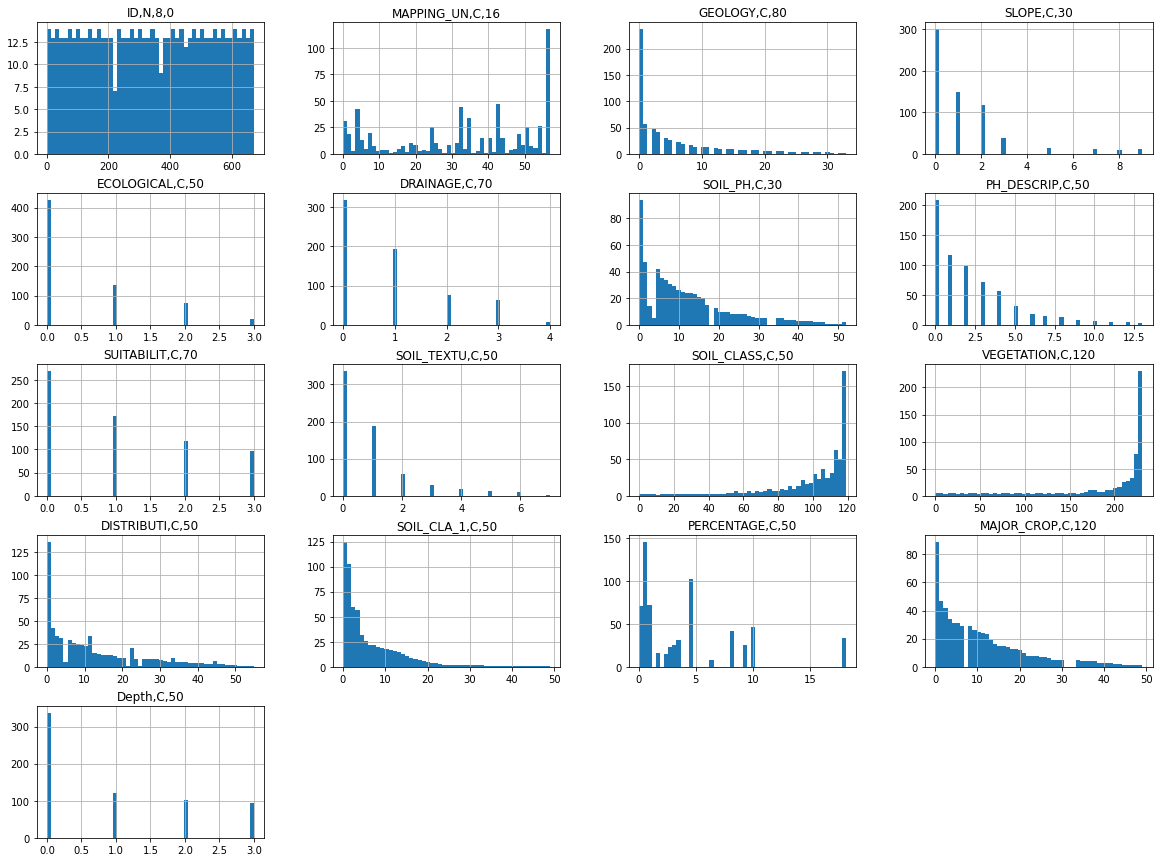

In [276]:
df.hist(bins = 50, figsize = (20, 15))
plt.show()

# Checking for missing values

In [277]:
df.isna().sum()

ID,N,8,0            0
MAPPING_UN,C,16     0
GEOLOGY,C,80        0
SLOPE,C,30          0
ECOLOGICAL,C,50     0
DRAINAGE,C,70       0
SOIL_PH,C,30        0
PH_DESCRIP,C,50     0
SUITABILIT,C,70     0
SOIL_TEXTU,C,50     0
SOIL_CLASS,C,50     0
VEGETATION,C,120    0
DISTRIBUTI,C,50     0
SOIL_CLA_1,C,50     0
PERCENTAGE,C,50     0
MAJOR_CROP,C,120    0
Depth,C,50          0
dtype: int64

In [278]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["ID,N,8,0", "MAPPING_UN,C,16", "GEOLOGY,C,80", "SLOPE,C,30", "ECOLOGICAL,C,50", "DRAINAGE,C,70", "SOIL_PH,C,30", "PH_DESCRIP,C,50", "SUITABILIT,C,70", "SOIL_TEXTU,C,50", "SOIL_CLASS,C,50", "VEGETATION,C,120", "DISTRIBUTI,C,50", "SOIL_CLA_1,C,50", "PERCENTAGE,C,50", "MAJOR_CROP,C,120", "Depth,C,50"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder = "passthrough")


transformed_df = transformer.fit_transform(df)
transformed_df


<658x1393 sparse matrix of type '<class 'numpy.float64'>'
	with 11186 stored elements in Compressed Sparse Row format>

In [279]:
transformed_df.toarray() # to show the array of the sparse matrix

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [280]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
transformed_df = encoder.fit_transform(categorical_features)
transformed_df

array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

# Spliting into X and Y

In [281]:
x = df.drop("MAPPING_UN,C,16", axis = 1)
y = df["MAPPING_UN,C,16"]

# Spliting into Training and Test

In [282]:
np.random.seed(42)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size = 0.2)

# Feature Scaling

In [283]:
cols = x_train.columns

In [284]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [285]:
x_train = pd.DataFrame(x_train, columns = [cols])

In [286]:
x_test = pd.DataFrame(x_test, columns = [cols])

# Random Forest Classifier Model

In [287]:
len(df)

658

In [288]:
clf=    RandomForestClassifier(random_state = 0)
#fit the model to the data
clf.fit( x_train, y_train,)
# evaluate the model 
clf.score( x_test,  y_test)

0.9924242424242424

# Hyperparameter Tuning 
this is done to correct the overfitting state of the model

In [289]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [290]:
param_grid = {
    'n_estimators': [200, 500],
    'max_leaf_nodes': [16,30],
}

In [291]:
cv_clf = GridSearchCV(estimator = clf, param_grid = param_grid, cv = 5)
cv_clf.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_leaf_nodes': [16, 30],
                         'n_estimators': [200, 500]})

In [292]:
cv_clf.best_params_

{'max_leaf_nodes': 30, 'n_estimators': 200}

In [293]:
clf1 = RandomForestClassifier(max_leaf_nodes = 30,  n_estimators = 200)

In [294]:
clf1.fit(x_train, y_train)

RandomForestClassifier(max_leaf_nodes=30, n_estimators=200)

In [295]:
clf1.score( x_test,  y_test)

0.9621212121212122

In [296]:
y_pred =clf1.predict(x_test)
y_pred

array([26, 53, 43, 54, 49, 57,  1,  1, 35, 56, 43, 35, 43, 35, 53, 57,  4,
       57, 57, 54, 57, 32, 32, 12,  4,  1, 56, 44, 43, 19,  4,  7, 20, 35,
       29, 54, 52, 57, 44, 19, 57, 48, 43, 49,  7, 52, 50,  4, 35, 49, 35,
       56, 43,  6, 57,  4, 35,  2,  4, 15, 15, 32, 57, 31,  1, 44, 54, 41,
       57,  7,  2,  4, 54, 56, 22, 57, 25, 32, 27, 57, 51, 49, 43, 49, 35,
       35, 51, 56, 52,  2, 54, 57,  6,  2, 12, 49, 20, 31,  5, 46, 43,  1,
        2,  7, 43, 31, 56, 51, 32, 57, 44, 38, 32, 19, 57, 57, 35, 12,  2,
       56, 57,  1, 29, 27, 20, 43,  4, 35, 12, 32,  4, 43], dtype=int64)

# Accuracy

In [297]:
cross_val_score(clf1, x_train, y_train, cv = 5, scoring = "accuracy")

array([0.93396226, 0.97142857, 0.96190476, 0.96190476, 0.97142857])

# Classification Report

In [298]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         9
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         4
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         0
          15       1.00      1.00      1.00         2
          19       1.00      1.00      1.00         3
          20       1.00      1.00      1.00         3
          22       1.00      1.00      1.00         1
          25       1.00      1.00      1.00         1
          26       1.00      1.00      1.00         1
          27       1.00      1.00      1.00         2
          29       1.00      1.00      1.00         2
          31       1.00    

# Confusion Matrix

In [299]:
y_prob = cross_val_predict(clf1, x_train, y_train, cv = 3)

In [300]:
conf_mx =  confusion_matrix(y_train, y_prob)
conf_mx

array([[ 8,  0,  0, ...,  0,  0,  0],
       [ 0, 17,  0, ...,  0,  0,  0],
       [ 0,  0, 13, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0, 22,  0],
       [ 0,  0,  0, ...,  0,  0, 72]], dtype=int64)

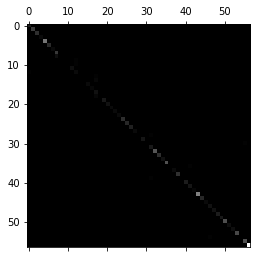

In [301]:
plt.matshow(conf_mx, cmap = plt.cm.gray)
plt.show()

In [302]:
row_sums = conf_mx.sum(axis = 1, keepdims = True)
norm_conf_mx = conf_mx / row_sums

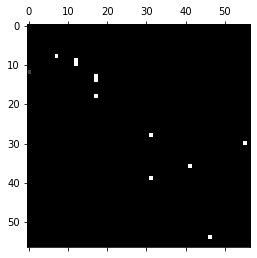

In [303]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap = plt.cm.gray)
plt.show()

# Feature Importance

In [304]:
import seaborn as sns

In [305]:
feature_scores = pd.Series(clf1.feature_importances_, index = x_train.columns).sort_values(ascending = False)
feature_scores

DISTRIBUTI,C,50     0.192497
MAJOR_CROP,C,120    0.149365
SOIL_PH,C,30        0.121312
PERCENTAGE,C,50     0.121277
PH_DESCRIP,C,50     0.054713
SLOPE,C,30          0.050363
GEOLOGY,C,80        0.049982
VEGETATION,C,120    0.047224
SOIL_TEXTU,C,50     0.043250
DRAINAGE,C,70       0.041989
SUITABILIT,C,70     0.037149
Depth,C,50          0.027902
SOIL_CLASS,C,50     0.025092
ECOLOGICAL,C,50     0.018134
ID,N,8,0            0.012141
SOIL_CLA_1,C,50     0.007610
dtype: float64

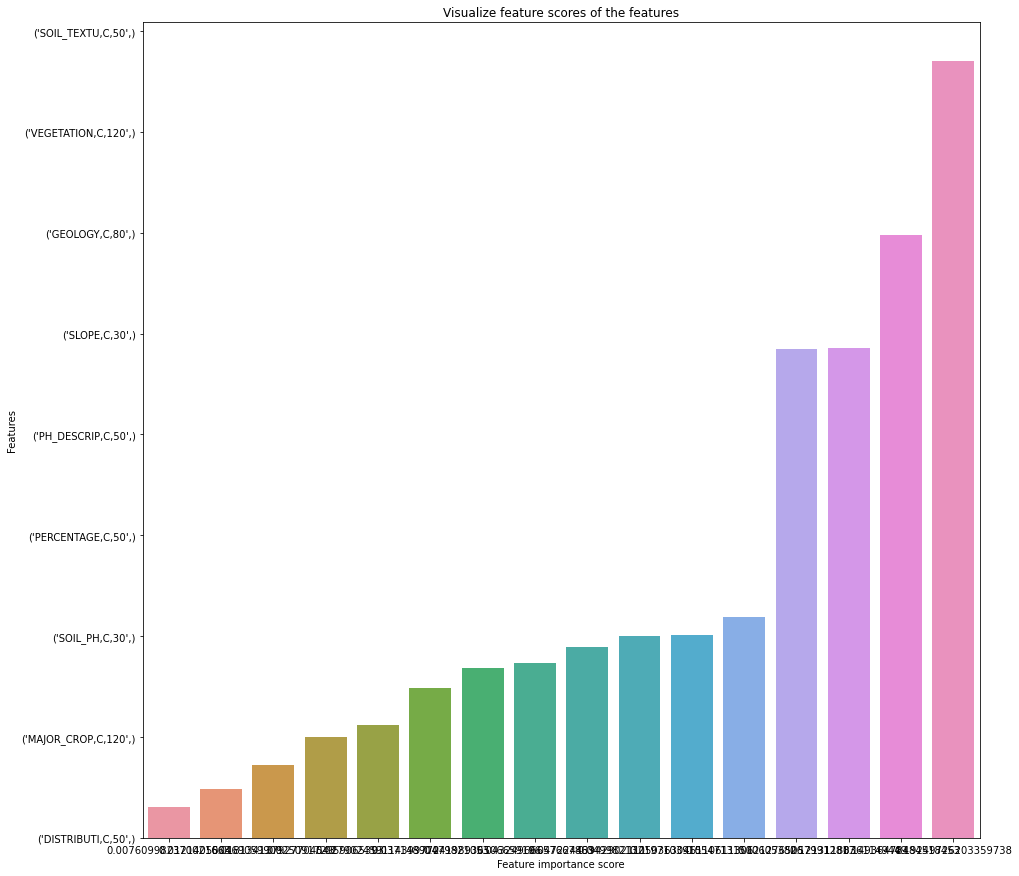

In [306]:
f, ax = plt.subplots(figsize = (15, 15))
ax = sns.barplot(x = feature_scores, y = feature_scores, data = df)
ax.set_title('Visualize feature scores of the features')
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

# Result and Conclusion


in this project i build a Random Forest Classifier to predict the soil properties for some given locations within south west region.
the model performed prety well with the accuracy score above 90%, confusion matrix and classification report are another tool to visualize the model performance. they yield good performance.
i used Random Forest Classifier to find the important features for the project which are seen in the bar plot above with  (SOIL_TEXTU,C,50, VEGETATION,C,120, GEOLOGY,C,80, SLOPE,C,30,  PH_DESCRIP,C,50) which are soil texture, vegetation cover, geology, slope, ph description respectively according to the data pdf.